In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt


In [33]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [35]:
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']


In [36]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train_inc = x_train[["MedInc"]]
x_test_inc = x_test[["MedInc"]]

In [37]:
def evaluate_model(y_true,y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true,y_pred)
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2: {r2:.2f}")

    plt.scatter(y_true,y_pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

Ridge Regression

MAE: 0.53
MSE: 0.56
RMSE: 0.75
R2: 0.58


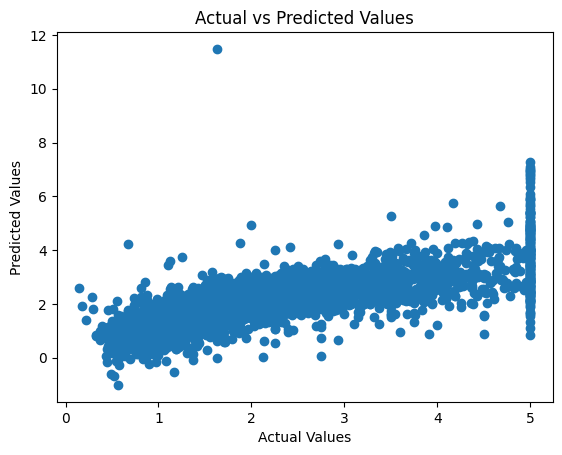

In [38]:
model = Ridge()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("Ridge Regression\n")
evaluate_model(y_test,pred)

Lasso Regression

MAE: 0.76
MSE: 0.94
RMSE: 0.97
R2: 0.28


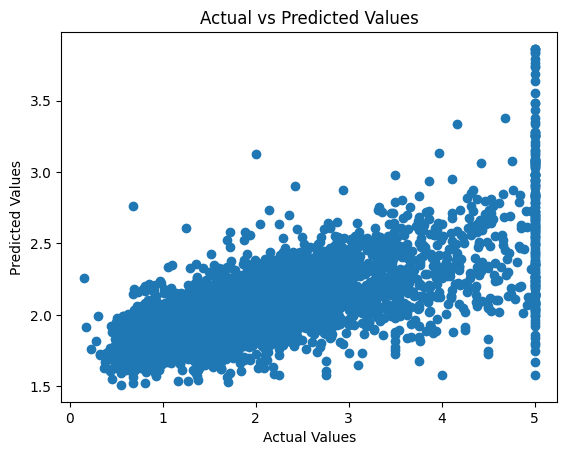

In [39]:
model = Lasso()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("Lasso Regression\n")
evaluate_model(y_test,pred)